In [52]:
import pandas as pd

### 1. Создайте единый датафрейм из двух представленных файлов, предварительно загрузив их в датафреймы df1, df2 ‚ способами:

In [53]:
df1 = pd.read_excel("lab2_1.xlsx")
df2 = pd.read_excel("lab2_2.xlsx")

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column                                                                                    Non-Null Count  Dtype         
---  ------                                                                                    --------------  -----         
 0   Отметка времени                                                                           29 non-null     datetime64[ns]
 1   Адрес электронной почты                                                                   29 non-null     object        
 2   Укажите свое Ф.И.О.                                                                       29 non-null     object        
 3   Укажите пол                                                                               29 non-null     object        
 4   Укажите возраст (полное число лет)                                                        29 non-null     int64         
 5   Укажите нап

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Отметка времени                     29 non-null     datetime64[ns]
 1   Укажите свое Ф.И.О.                 29 non-null     object        
 2   Укажите пол                         29 non-null     object        
 3   Укажите возраст (полное число лет)  29 non-null     int64         
 4   Укажите Ваши научные интересы:      29 non-null     object        
 5   Адрес электронной почты             5 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.5+ KB


1.1 Склейте по вертикали

In [57]:
ver_concat_df = pd.concat([df1, df2], axis=0)

In [58]:
ver_concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 28
Data columns (total 7 columns):
 #   Column                                                                                    Non-Null Count  Dtype         
---  ------                                                                                    --------------  -----         
 0   Отметка времени                                                                           58 non-null     datetime64[ns]
 1   Адрес электронной почты                                                                   34 non-null     object        
 2   Укажите свое Ф.И.О.                                                                       58 non-null     object        
 3   Укажите пол                                                                               58 non-null     object        
 4   Укажите возраст (полное число лет)                                                        58 non-null     int64         
 5   Укажите направле

1.2 Склейте по горизонтали

In [59]:
hor_concat_df = pd.concat([df1, df2], axis=1)

In [60]:
hor_concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column                                                                                    Non-Null Count  Dtype         
---  ------                                                                                    --------------  -----         
 0   Отметка времени                                                                           29 non-null     datetime64[ns]
 1   Адрес электронной почты                                                                   29 non-null     object        
 2   Укажите свое Ф.И.О.                                                                       29 non-null     object        
 3   Укажите пол                                                                               29 non-null     object        
 4   Укажите возраст (полное число лет)                                                        29 non-null     int64         
 5   Укажите на

1.3 Сделайте внутренний join по ключу "Укажите свое Ф.И.О."

Проверим, что для объединения по ключам, ключи уникальны

In [61]:
df1.duplicated(subset="Укажите свое Ф.И.О.").sum(), df2.duplicated(
    subset="Укажите свое Ф.И.О."
).sum()

(0, 0)

In [62]:
join_df = pd.merge(df1, df2, how="inner", on="Укажите свое Ф.И.О.")

In [63]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column                                                                                    Non-Null Count  Dtype         
---  ------                                                                                    --------------  -----         
 0   Отметка времени_x                                                                         23 non-null     datetime64[ns]
 1   Адрес электронной почты_x                                                                 23 non-null     object        
 2   Укажите свое Ф.И.О.                                                                       23 non-null     object        
 3   Укажите пол_x                                                                             23 non-null     object        
 4   Укажите возраст (полное число лет)_x                                                      23 non-null     int64         
 5   Укажите на

Смотрим, что не объединилось

In [ ]:
join_check = pd.merge(df1, df2, how="outer", on="Укажите свое Ф.И.О.", indicator=True)

join_check[join_check["_merge"] != "both"]

### 2. В df1, df2 добавьте новый столбец ФИО, который содержит фамилию + инициалы, и сделайте новый внутренний join по этому ключу, получив датафрейм df. Сравните с пп. 1.3

In [73]:
df1["Укажите свое Ф.И.О."].head()

0     Бородина Агния Геннадьевна
1     Долгов Андрей Владимирович
2             Крюченков Вячеслав
3    Данченков Алексей Денисович
4      Закурдаев Никита Иванович
Name: Укажите свое Ф.И.О., dtype: object

In [65]:
df1["ФИО"] = df1["Укажите свое Ф.И.О."].apply(
    lambda x: " ".join(
        [
            x.split()[0],
            f"{x.split()[1][0]}." if len(x.split()) > 1 else "",
            f"{x.split()[2][0]}." if len(x.split()) > 2 else "",
        ]
    ).strip()
)

In [66]:
df2["ФИО"] = df1["Укажите свое Ф.И.О."].apply(
    lambda x: " ".join(
        [
            x.split()[0],
            f"{x.split()[1][0]}." if len(x.split()) > 1 else "",
            f"{x.split()[2][0]}." if len(x.split()) > 2 else "",
        ]
    ).strip()
)

Снова проверяем на дубликаты

In [67]:
df1.duplicated(subset="ФИО").sum(), df2.duplicated(subset="ФИО").sum()

(0, 0)

In [68]:
df = pd.merge(df1, df2, how="inner", on="ФИО")

In [69]:
df.shape, join_df.shape

((29, 13), (23, 11))

Вывод: после приведения ключа к формату "Фамилия И.О." получилось полное объединение таблиц

### 3. Постройте круговую диаграмму Топ-5 самых главных научных интересов по частоте, используя df

In [162]:
# Разделение строки на список научных интересов с использованием регулярного выражения и преобразование в Series
interests = df["Укажите Ваши научные интересы:"].str.findall(r"[\w\s]+").explode()

In [163]:
interests

0          Групповой анализ
0                          
0     Прикладная математика
0                          
0                    Оптика
              ...          
27                         
27             Физика полей
27                         
27          Электродинамика
28    Прикладная математика
Name: Укажите Ваши научные интересы:, Length: 393, dtype: object

In [165]:
all_interests = pd.Series(filter(lambda x: x != " ", interests.tolist()))
counts_interests = all_interests.value_counts()

counts_interests

Прикладная математика                                                                       14
Статистика                                                                                  11
Дискретная математика                                                                       11
Математическая статистика                                                                   11
Теория игр                                                                                  10
Математическое моделирование                                                                10
Теория вероятностей                                                                         10
Численные методы                                                                             9
Теории игр                                                                                   8
Вычислительная математика                                                                    8
Математический анализ                             

Чтобы найти топ-5 интересов, надо учесть, что место топа может попасть несколько значений из-за одинакового их количества

In [160]:
unique_counts = counts_interests.unique()

# Выбор топ-5 имен с учетом возможных равных значений
top_5 = counts_interests[counts_interests.isin(pd.Series(unique_counts).nlargest(5))]

top_5

Прикладная математика           14
Статистика                      11
Дискретная математика           11
Математическая статистика       11
Теория игр                      10
Математическое моделирование    10
Теория вероятностей             10
Численные методы                 9
Теории игр                       8
Вычислительная математика        8
Математический анализ            8
Математическая логика            8
Name: count, dtype: int64

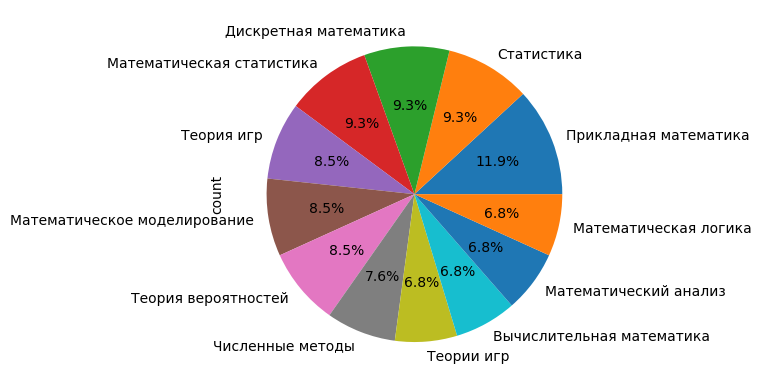

In [203]:
top_5.plot(kind="pie", autopct="%1.1f%%")

### 4. Создайте кросс-таблицу по полу и научным интересам (все, что не топ-5, замените на Другое)

In [200]:
# присоединяем к интересам пол
result_df = pd.merge(
    interests.to_frame(),
    df["Укажите пол_x"],
    left_index=True,
    right_index=True,
).reset_index()

In [201]:
# Удаляем из таблицы интересы-пробел
result_df = result_df.drop(
    result_df[result_df["Укажите Ваши научные интересы:"] == " "].index
)

result_df

,index,Укажите Ваши научные интересы:,Укажите пол_x
0,0,Групповой анализ,женский
2,0,Прикладная математика,женский
4,0,Оптика,женский
6,0,Физика элементарных частиц,женский
8,0,Экспериментальная физика высоких энергий,женский
...,...,...,...
385,27,Физика конденсированных сред,женский
387,27,Физика кондесированного состояния,женский
389,27,Физика полей,женский
391,27,Электродинамика,женский


Все, что не топ-5 интересов - заменяем на "Другое"

In [202]:
result_df["Укажите Ваши научные интересы:"] = result_df[
    "Укажите Ваши научные интересы:"
].where(
    result_df["Укажите Ваши научные интересы:"].isin(top_5.index.tolist()),
    other="Другое",
)

result_df["Укажите Ваши научные интересы:"].value_counts(dropna=False)

Укажите Ваши научные интересы:
Другое                          93
Прикладная математика           14
Математическая статистика       11
Статистика                      11
Дискретная математика           11
Математическое моделирование    10
Теория игр                      10
Теория вероятностей             10
Численные методы                 9
Вычислительная математика        8
Математическая логика            8
Математический анализ            8
Теории игр                       8
Name: count, dtype: int64

In [204]:
pd.crosstab(result_df["Укажите пол_x"], result_df["Укажите Ваши научные интересы:"])

Укажите Ваши научные интересы:,Вычислительная математика,Дискретная математика,Другое,Математическая логика,Математическая статистика,Математический анализ,Математическое моделирование,Прикладная математика,Статистика,Теории игр,Теория вероятностей,Теория игр,Численные методы
Укажите пол_x,,,,,,,,,,,,,
женский,1,2,25,2,4,1,2,4,2,1,4,2,2
мужской,7,9,68,6,7,7,8,10,9,7,6,8,7


### 5. Сделайте сводную таблицу по научным интересам и направлениям обучения (в обоих случаях приведите переменные к максимум 5-6 категориальным значениям), в качестве значений ячеек используйте средний возраст.

In [249]:
# присоединяем к интересам код направления
result_df2 = pd.merge(
    interests.to_frame(),
    df[
        [
            "Укажите направление бакалавриата (числовой код, например 09.03.04), которое Вы закончили",
            "Укажите возраст (полное число лет)_x",
        ]
    ],
    left_index=True,
    right_index=True,
).reset_index()

# Удаляем из таблицы интересы-пробел
result_df2 = result_df2.drop(
    result_df2[result_df2["Укажите Ваши научные интересы:"] == " "].index
)

result_df2

,index,Укажите Ваши научные интересы:,"Укажите направление бакалавриата (числовой код, например 09.03.04), которое Вы закончили",Укажите возраст (полное число лет)_x
0,0,Групповой анализ,01.03.02,22
2,0,Прикладная математика,01.03.02,22
4,0,Оптика,01.03.02,22
6,0,Физика элементарных частиц,01.03.02,22
8,0,Экспериментальная физика высоких энергий,01.03.02,22
...,...,...,...,...
385,27,Физика конденсированных сред,03.03.01,22
387,27,Физика кондесированного состояния,03.03.01,22
389,27,Физика полей,03.03.01,22
391,27,Электродинамика,03.03.01,22


In [250]:
result_df2["Интересы, категория"] = (
    "Другое"  # По умолчанию присваиваем категорию "Другое"
)

result_df2.loc[
    result_df2["Укажите Ваши научные интересы:"].str.contains("физика", case=False),
    "Интересы, категория",
] = "Физика"
result_df2.loc[
    result_df2["Укажите Ваши научные интересы:"].str.contains("матем", case=False),
    "Интересы, категория",
] = "Математика"

result_df2.loc[
    result_df2["Укажите Ваши научные интересы:"].str.contains("теори", case=False),
    "Интересы, категория",
] = "Какая-нибудь теория"

result_df2.loc[
    result_df2["Укажите Ваши научные интересы:"].str.contains("статистика", case=False),
    "Интересы, категория",
] = "Статистика"

In [251]:
result_df2["Интересы, категория"].value_counts(dropna=False)

Интересы, категория
Математика             63
Другое                 55
Какая-нибудь теория    45
Физика                 26
Статистика             22
Name: count, dtype: int64

Выдялем 5 наиболее встречаемых кодов направлений

In [252]:
five_cats_codes = (
    result_df2[
        "Укажите направление бакалавриата (числовой код, например 09.03.04), которое Вы закончили"
    ]
    .value_counts()
    .head(5)
    .index.tolist()
)

five_cats_codes

['01.03.02',
 '01.04.02',
 '03.03.01',
 '01.03.04',
 'Программный инжиниринг (код не помню)']

И заменяем остальные коды на "Другое"

In [253]:
result_df2["Код, категория"] = result_df2[
    "Укажите направление бакалавриата (числовой код, например 09.03.04), которое Вы закончили"
].where(
    result_df2[
        "Укажите направление бакалавриата (числовой код, например 09.03.04), которое Вы закончили"
    ].isin(five_cats_codes),
    other="Другое",
)

result_df2["Код, категория"].value_counts(dropna=False)

Код, категория
01.03.02                                 122
Другое                                    34
01.04.02                                  20
03.03.01                                  15
01.03.04                                  11
Программный инжиниринг (код не помню)      9
Name: count, dtype: int64

In [254]:
result_df2

,index,Укажите Ваши научные интересы:,"Укажите направление бакалавриата (числовой код, например 09.03.04), которое Вы закончили",Укажите возраст (полное число лет)_x,"Интересы, категория","Код, категория"
0,0,Групповой анализ,01.03.02,22,Другое,01.03.02
2,0,Прикладная математика,01.03.02,22,Математика,01.03.02
4,0,Оптика,01.03.02,22,Другое,01.03.02
6,0,Физика элементарных частиц,01.03.02,22,Физика,01.03.02
8,0,Экспериментальная физика высоких энергий,01.03.02,22,Физика,01.03.02
...,...,...,...,...,...,...
385,27,Физика конденсированных сред,03.03.01,22,Физика,03.03.01
387,27,Физика кондесированного состояния,03.03.01,22,Физика,03.03.01
389,27,Физика полей,03.03.01,22,Физика,03.03.01
391,27,Электродинамика,03.03.01,22,Другое,03.03.01


Теперь может создать сводную таблицу:

In [255]:
pivot_table = pd.pivot_table(
    result_df2,
    index="Интересы, категория",
    columns="Код, категория",
    values="Укажите возраст (полное число лет)_x",
    aggfunc="mean",
)

pivot_table

"Код, категория",01.03.02,01.03.04,01.04.02,03.03.01,Другое,Программный инжиниринг (код не помню)
"Интересы, категория",,,,,,
Другое,22.064516,21.0,22.0,22.0,22.500000,22.0
Какая-нибудь теория,22.192308,21.0,22.0,22.0,22.454545,22.0
Математика,22.170732,21.0,22.0,NaN,23.875000,22.0
Статистика,22.200000,21.0,NaN,22.0,23.750000,22.0
Физика,22.000000,NaN,22.0,22.0,21.333333,NaN
